# 🧩 Notebook 09: Model Selection & Information Criteria

In [1]:
# Setup and Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# Imports
from utils.compare_models import compare_model_metrics, forward_stepwise_selection
from utils.model_utils import export_model_summary_as_text

import statsmodels.formula.api as smf

In [2]:
# Paths
DATA_PATH = Path("../synthetic_data")
EXPORT_PLOTS = Path("../exports/plots/09_model_selection")
EXPORT_TABLES = Path("../exports/tables/09_model_selection")
EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

In [3]:
# Load dataset
ols_df = pd.read_csv(DATA_PATH / "ols_data.csv")

In [4]:
# 🔹 Fit Multiple Models
models = {
    'Model_1': smf.ols('y ~ X1', data=ols_df).fit(),
    'Model_2': smf.ols('y ~ X2', data=ols_df).fit(),
    'Model_3': smf.ols('y ~ X1 + X2', data=ols_df).fit(),
    'Model_4': smf.ols('y ~ X1 + X2 + I(X1*X2)', data=ols_df).fit(),
}

In [5]:
# 🔸 Compare AIC, BIC, R-squared
comparison_df = compare_model_metrics(models)
display(comparison_df)

,Model,AIC,BIC,R_squared,Adj_R_squared
3,Model_4,728.504409,741.697679,0.824506,0.821820
2,Model_3,728.652961,738.547913,0.822611,0.820810
0,Model_1,946.868435,953.465070,0.466519,0.463825
1,Model_2,1006.866681,1013.463316,0.279883,0.276246


In [6]:
# Export
comparison_df.to_csv(EXPORT_TABLES / "model_comparison_metrics.csv", index=False)

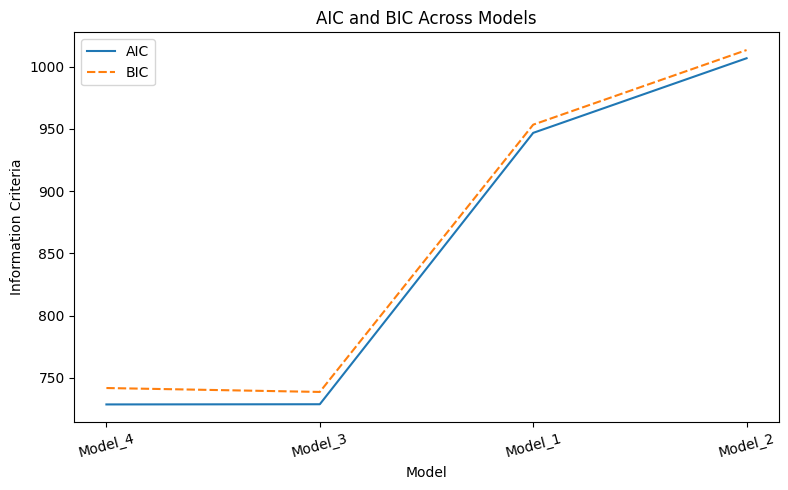

In [7]:
# 📈 Visual Comparison
plt.figure(figsize=(8, 5))
sns.lineplot(data=comparison_df.set_index('Model')[['AIC', 'BIC']])
plt.title("AIC and BIC Across Models")
plt.ylabel("Information Criteria")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig(EXPORT_PLOTS / "aic_bic_comparison.png", dpi=300)
plt.show()

In [8]:
# 🔍 Forward Stepwise Regression
predictors = ['X1', 'X2']
response = 'y'
stepwise_model, selected = forward_stepwise_selection(ols_df, response, predictors)

# Export stepwise summary
export_model_summary_as_text(stepwise_model, EXPORT_TABLES / "stepwise_model_summary.txt")

print("\nStepwise Selection Chose Predictors:", selected)


✔ Added X1, AIC = 946.87
✔ Added X2, AIC = 728.65

Stepwise Selection Chose Predictors: ['X1', 'X2']


# ✅ Summary:

- Fit four candidate models with different complexity
- Compared models using AIC, BIC, and R-squared metrics
- Visualized model selection criteria using a line plot
- Performed forward stepwise selection using AIC as the stopping criterion
- Exported model metrics table and selected model summary